In [6]:
#!usr/bin/python

""" Imports and plots the E values for the simulated vs. actual 
    ecosystem data. Also looks at the frequency distributions 
    of the E values in both simulated and actual fitted results."""

__author__ = 'Katie Hindson (kah15@ic.ac.uk)'
__version__ = '0.0.1'
		
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.patches as mpatches
from pylab import *
from scipy.optimize import curve_fit
import random
%matplotlib inline

## Plotting the function that species richness is following w.r.t. lat (that is implemented in the simulation)

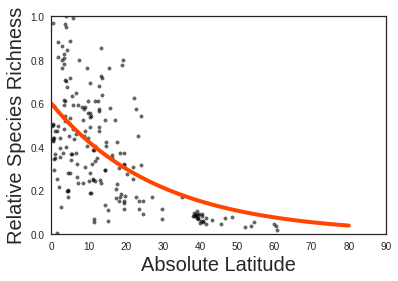

In [7]:
lats_richness_df = pd.read_csv("../Data/gentry_transect_data/gentry_lats_richness.csv")

min_val = min(lats_richness_df.richness)
max_val = max(lats_richness_df.richness)

def func(x, a, b):
    return np.exp(-a*x - b)

coeffs, pcov = curve_fit(func, lats_richness_df.abs_lat, lats_richness_df.richness/max_val, p0 = (0.5, 0.7))
lat_fit = np.linspace(0, 80, 100)
rich_fit = func(lat_fit, *coeffs)

with plt.style.context("seaborn-white"):        
    plt.scatter(lats_richness_df.abs_lat, lats_richness_df.richness/max_val, color = 'black', alpha = 0.6, s = 12)
    plt.plot(lat_fit, rich_fit, '-', linewidth = 4, color = 'orangered')

    #plt.fill([0, 30, 30, 0], [0, 0, 1, 1], 'gainsboro', alpha = 0.2)
    #plt.fill([30, 60, 60, 30], [0, 0, 1, 1], 'darkgray', alpha = 0.2)
    #plt.fill([60, 90, 90, 60], [0, 0, 1, 1], 'dimgray', alpha = 0.2)

    #plt.text(6, 1.01, 'Tropical Lats', fontsize = 14)
    #plt.text(40, 1.01, 'Mid Lats', fontsize = 14)
    #plt.text(70, 1.01, 'Upper Lats', fontsize = 14)

    plt.xlim([0, 90])
    plt.ylim([0, 1])

    plt.ylabel('Relative Species Richness', fontsize = 20)
    plt.xlabel('Absolute Latitude', fontsize = 20)


## Building a data frame with simulation having temp range w.r.t. abs. lat. and the actual fluxnet fit results 

In [8]:
actual_df = pd.read_csv("../Results/median_temps/sites_boltz_fit_median_temps_only_results.csv")
fluxnet_df = pd.read_pickle("../Data/median_temps/fluxnet_median_temps_only.pkl")

# sorting into ascending order of siteID values 
actual_df = actual_df.sort_values(by = 'site_ID', ascending = True)
fluxnet_df = fluxnet_df.sort_values(by = 'siteID', ascending = True)

# getting the temperature ranges for each site from the fluxnet data
E_actual_temp_range = np.array(fluxnet_df.groupby('siteID')['TA_F_inKelvin'].max()) - np.array(fluxnet_df.groupby('siteID')['TA_F_inKelvin'].min())

# Making a data frame of the site IDs and their corresponding E simulated and E actual.

T_range = pd.DataFrame({'siteID' : actual_df.site_ID, 
                        'lat': actual_df.lat, 
                        'actual_temp_range' : E_actual_temp_range})

# removing any values that are Nan
T_range = T_range[T_range.siteID.notnull()]

## Plotting the function that temperature range is following w.r.t. lat (that is implemented in the simulation)

Polynomial fitted: -0.01x^2 + 0.89x + 9.43
R-squared value fo the fit: 0.333507920033


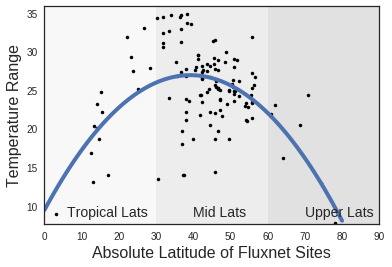

In [9]:
coeffs = np.polyfit(np.abs(T_range.lat), T_range.actual_temp_range, 2)
p = np.poly1d(coeffs)
xp = np.linspace(0, 80, 100)
min_val = min(T_range.actual_temp_range) + 1
max_val = max(T_range.actual_temp_range) + 1

with plt.style.context("seaborn-white"):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.plot(np.abs(T_range.lat), T_range.actual_temp_range, '.', color = 'black')
    plt.plot(xp, p(xp), '-', linewidth = 4)
    plt.xlabel('Absolute Latitude of Fluxnet Sites', fontsize = 16)
    plt.ylabel('Temperature Range', fontsize = 16)
    #plt.title('Absolute latitude vs. temperature \nranges for sites in Fluxnet', fontsize = 16)
    plt.xlim([0, 90])
    plt.ylim([min_val, max_val])
    
    plt.fill([0, 30, 30, 0], [min_val, min_val, max_val, max_val], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [min_val, min_val, max_val, max_val], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [min_val, min_val, max_val, max_val], 'dimgray', alpha = 0.2)
    
    plt.text(6, min_val + 1, 'Tropical Lats', fontsize = 14)
    plt.text(40, min_val + 1, 'Mid Lats', fontsize = 14)
    plt.text(70, min_val + 1, 'Upper Lats', fontsize = 14)


    results = {}
    # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()


    # fit values, and mean
    yhat = p(np.abs(T_range.lat))                       # or [p(z) for z in x]
    ybar = np.sum(T_range.actual_temp_range)/len(T_range.actual_temp_range)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((T_range.actual_temp_range - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    
print('Polynomial fitted: ' + str(round(results['polynomial'][0], 2)) + 'x^2 + ' + str(round(results['polynomial'][1], 2)) + 'x + ' + str(round(results['polynomial'][2], 2)))
print('R-squared value fo the fit: ' + str(results['determination']))

## Plotting the Richness and Temp Range relationships that are implemented onto the same plot

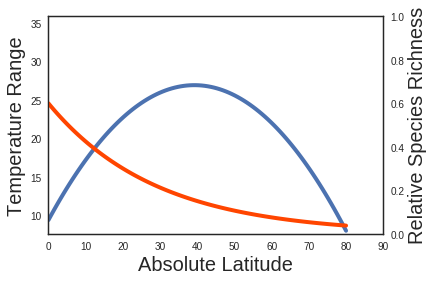

In [10]:
min_val = min(T_range.actual_temp_range) + 1
max_val = max(T_range.actual_temp_range) + 1

boundaries = [0, 36.0, 41.0, 46.0, 50.0, 90]


with plt.style.context("seaborn-white"):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.plot(xp, p(xp), '-', linewidth = 4)
    plt.xlabel('Absolute Latitude', fontsize = 20)
    plt.ylabel('Temperature Range', fontsize = 20)
    #plt.title('Absolute latitude vs. temperature \nranges for sites in Fluxnet', fontsize = 16)
    plt.xlim([0, 90])
    plt.ylim([min_val, max_val])
    
   
    #plt.fill([boundaries[0], boundaries[1], boundaries[1], boundaries[0]], [min_val, min_val, max_val, max_val], 
    #         'gainsboro', alpha = 0.1)
    #plt.fill([boundaries[1], boundaries[2], boundaries[2], boundaries[1]], 
    #         [min_val, min_val, max_val, max_val], 'darkgray', alpha = 0.2)
    #plt.fill([boundaries[2], boundaries[3], boundaries[3], boundaries[2]], 
    #         [min_val, min_val, max_val, max_val], 'dimgray', alpha = 0.2)
    #plt.fill([boundaries[3], boundaries[4], boundaries[4], boundaries[3]], 
    #         [min_val, min_val, max_val, max_val], 'black', alpha = 0.2)
    #plt.fill([boundaries[4], boundaries[5], boundaries[5], boundaries[4]], [min_val, min_val, max_val, max_val], 
    #         'black', alpha = 0.3)

    ax2 = ax1.twinx()
    plt.plot(lat_fit, rich_fit, '-', linewidth = 4, color = 'orangered')
    plt.ylim([0, 1])
    plt.xlim([0, 90])

    plt.ylabel('Relative Species Richness', fontsize = 20)
    plt.xlabel('Absolute Latitude', fontsize = 20)
    #plt.title('Function applied to simulations for richness varying\nwith respect to absolute latitude', fontsize = 16)

## Creating data frame from simulated results of richness + T range w.r.t. lat

In [11]:
sim_df = pd.read_csv('../Results/median_temps/lognormal_dist/richness_and_temp_wrt_lat/med_temps_NOT_CONVERTED_simulated_E_B0.csv')
sim_df_actual_temps = pd.read_csv('../Results/median_temps/lognormal_dist/richness_and_temp_wrt_lat/ACTUAL_TEMPS_med_temps_NOT_CONVERTED_simulated_E_B0.csv')

# sorting into ascending order of siteID values since this way the indexing of the 
# two data frames will be the same.
sim_df = sim_df.sort_values(by = 'siteID', ascending = True)
sim_df_actual_temps = sim_df_actual_temps.sort_values(by = 'siteID', ascending = True)

# getting the simulated E and lnB0 values as the means of the 150 iterations
E_sim_mean = sim_df.groupby('siteID')['E'].mean().tolist()
E_sim_median = sim_df.groupby('siteID')['E'].median().tolist()
E_sim_mean_actual_temps = sim_df_actual_temps.groupby('siteID')['E'].mean().tolist()

# Making a data frame of the site IDs and their corresponding E simulated and E actual.

E_vals = pd.DataFrame({'siteID' : actual_df.site_ID, 'E_sim_mean' : E_sim_mean,
                       'E_sim_median' : E_sim_median, 'E_actual' : actual_df.E,
                      'E_sim_mean_actual_temps' : E_sim_mean_actual_temps})

# removing any values that are Nan
E_vals = E_vals[E_vals.siteID.notnull()]

E_vals['lat'] = T_range['lat']
E_vals['actual_temp_range'] = T_range['actual_temp_range']

E_vals = E_vals[E_vals.E_sim_mean.notnull()]
E_vals = E_vals[E_vals.E_sim_median.notnull()]
E_vals = E_vals[E_vals.E_sim_mean_actual_temps.notnull()]
E_vals = E_vals[E_vals.E_actual.notnull()]
E_vals = E_vals[E_vals.E_sim_mean != -np.inf]
E_vals = E_vals[(E_vals.E_actual > 0) & (E_vals.E_actual < 2)]

## Adding variance in the E values across latitude gradients to the df

In [12]:
E_vals['abs_lat'] = np.abs(E_vals.lat)
E_vals['lat_range'] = [np.nan] * len(E_vals.abs_lat)
E_vals['var_E'] = [np.nan] * len(E_vals.abs_lat)
E_vals['var_E_actual'] = [np.nan] * len(E_vals.abs_lat)

E_vals.lat_range.loc[(E_vals.abs_lat > -1) & (E_vals.abs_lat <= 30)] = ['0-30 (Tropical Lat)'] * len(E_vals[(E_vals.abs_lat > -1) & (E_vals.abs_lat <= 30)].siteID)
E_vals.lat_range.loc[(E_vals.abs_lat > 30) & (E_vals.abs_lat <= 60)] = ['31-60 (Mid Lat)'] * len(E_vals[(E_vals.abs_lat > 30) & (E_vals.abs_lat <= 60)].siteID)
E_vals.lat_range.loc[(E_vals.abs_lat > 60) & (E_vals.abs_lat <= 90)] = ['61-90 (Upper Lat)'] * len(E_vals[(E_vals.abs_lat > 60) & (E_vals.abs_lat <= 90)].siteID)

trop_var = np.var(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'])
E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'var_E'] = trop_var

mid_var = np.var(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'])
E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'var_E'] = mid_var

upper_var = np.var(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'])
E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'var_E'] = upper_var

trop_var_actual = np.var(E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'])
E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'var_E_actual'] = trop_var_actual

mid_var_actual = np.var(E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'])
E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'var_E_actual'] = mid_var_actual 

upper_var_actual = np.var(E_vals.E_actual[E_vals.lat_range ==  '61-90 (Upper Lat)'])
E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'var_E_actual'] = upper_var_actual
                                                                 
# Actual E values variance
E_vals.loc[E_vals.lat_range == 
                '0-30 (Tropical Lat)', 'var_E_actual_temps'] = np.var(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == 
                                                               '0-30 (Tropical Lat)'])
E_vals.loc[E_vals.lat_range == 
                '31-60 (Mid Lat)', 'var_E_actual_temps'] = np.var(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == 
                                                                    '31-60 (Mid Lat)'])
E_vals.loc[E_vals.lat_range == 
                '61-90 (Upper Lat)', 'var_E_actual_temps'] = np.var(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == 
                                                                    '61-90 (Upper Lat)'])



/home/cmee10/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Actual data E values and their variance vs. absolute latitude

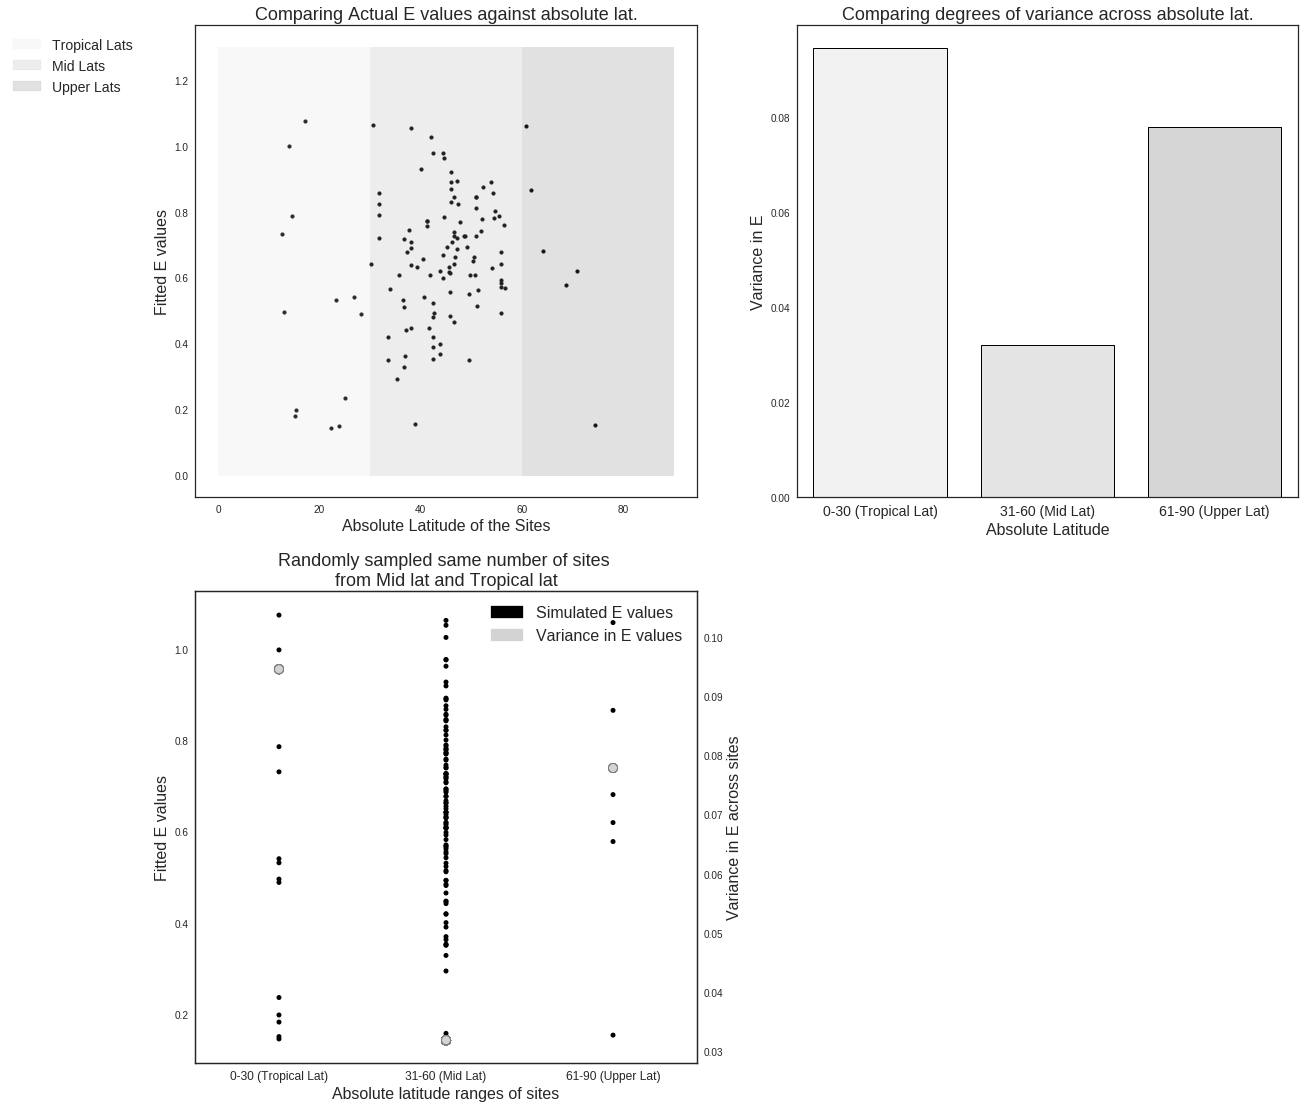

In [13]:
E_vals = E_vals.sort_values(by = 'lat_range', ascending = True)

with plt.style.context("seaborn-white"):
    fig, ax = plt.subplots(figsize = (16, 15))
    fig.tight_layout()

    ax1 = plt.subplot(2, 2, 1)
    plt.fill([0, 30, 30, 0], [0, 0, 1.3, 1.3], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.scatter(np.abs(E_vals.lat), E_vals.E_actual, color = 'black', s = 14)
    plt.title('Comparing Actual E values against absolute lat.', 
              fontsize = 18)
    plt.xlabel('Absolute Latitude of the Sites', fontsize = 16)
    plt.ylabel('Fitted E values', fontsize = 16)
    low_lat = mpatches.Patch(color='gainsboro', alpha = 0.2, label='Tropical Lats')
    mid_lat = mpatches.Patch(color = 'darkgray', alpha = 0.2, label = 'Mid Lats')
    upper_lat = mpatches.Patch(color = 'dimgray', alpha = 0.2, label = 'Upper Lats')
    plt.legend(bbox_to_anchor=(-0.1, 1.0), handles=[low_lat, mid_lat, upper_lat], fontsize = 14)

    ax2 = plt.subplot(2, 2, 2)
    pal = sns.light_palette("darkgray")
    sns.barplot(E_vals.lat_range, E_vals.var_E_actual, palette = pal, linewidth = 1, edgecolor = 'black')
    ax2.set_title('Comparing degrees of variance across absolute lat.', fontsize = 18)
    ax2.set_ylabel('Variance in E', fontsize = 16)
    ax2.set_xlabel('Absolute Latitude', fontsize = 16)
    ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)

    ax3 = plt.subplot(2, 2, 3)
    sns.stripplot(E_vals.lat_range, E_vals.E_actual, color = 'black', label = 'E values')
    ax3.set_xlabel('Absolute latitude ranges of sites', fontsize = 16)
    ax3.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 12)
    ax3.set_ylabel('Fitted E values', fontsize = 16)
    ax3.set_title('Randomly sampled same number of sites \nfrom Mid lat and Tropical lat',
                 fontsize = 18)
    ax4 = ax3.twinx()
    sns.stripplot(E_vals.lat_range, E_vals.var_E_actual, color = 'lightgrey', size = 9, linewidth = 1)
    ax4.set_ylabel('Variance in E across sites', fontsize = 16)

    blue_patch = mpatches.Patch(color='black', label='Simulated E values')
    black_patch = mpatches.Patch(color = 'lightgrey', label = 'Variance in E values')
    plt.legend(handles=[blue_patch, black_patch], fontsize = 16)

## Simulated Es vs. abs. latitude

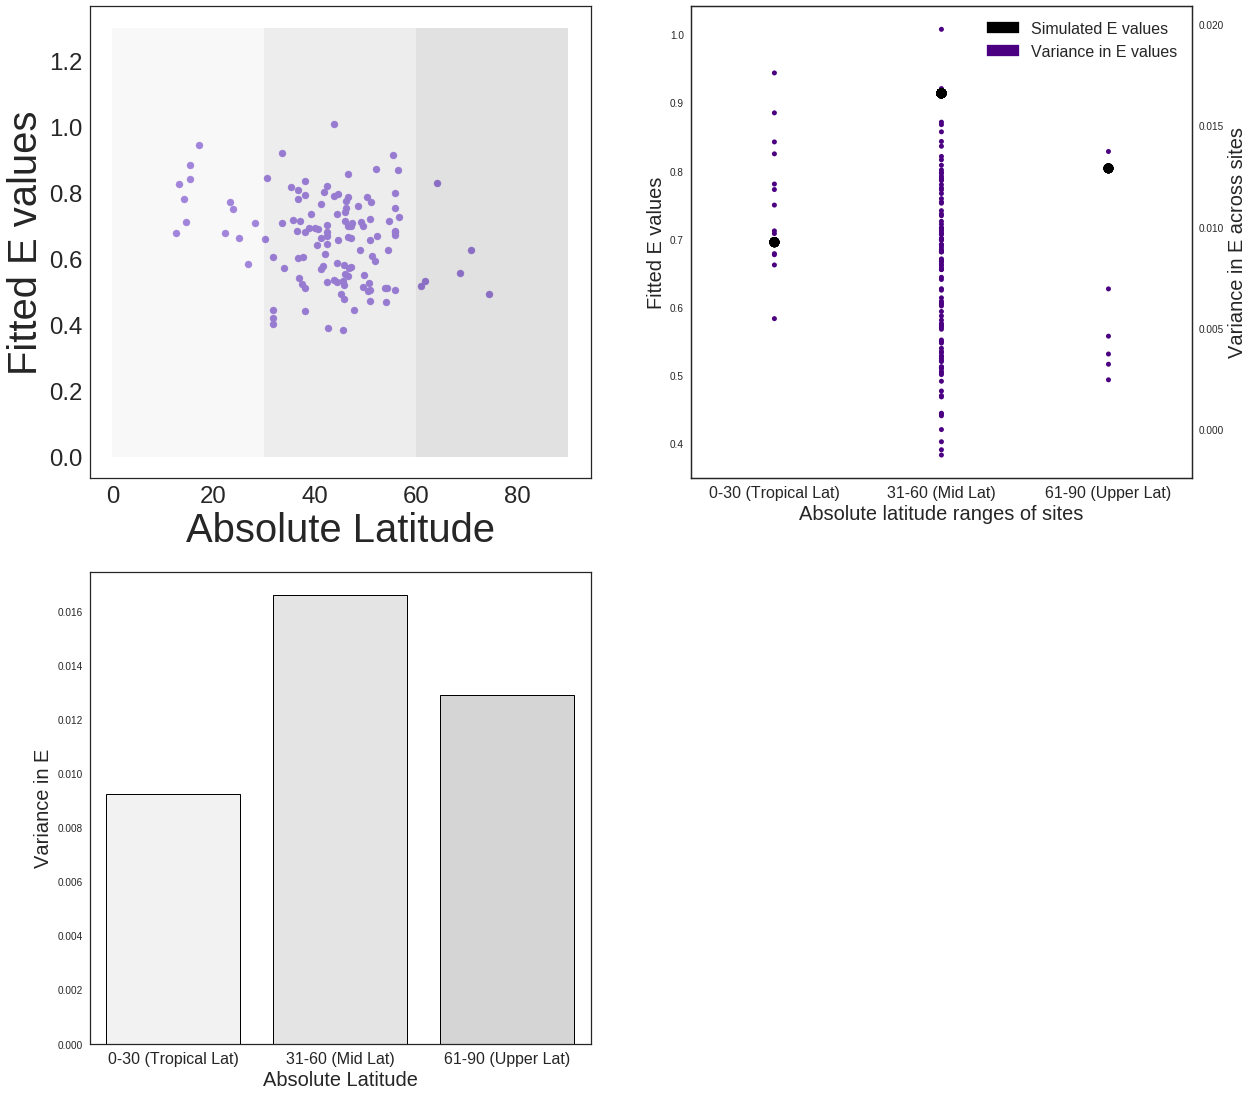

In [14]:
fig, ax = plt.subplots(figsize = (16, 15))
fig.tight_layout()

with plt.style.context("seaborn-white"):
    ax1 = plt.subplot(2, 2, 1)
    plt.fill([0, 30, 30, 0], [0, 0, 1.3, 1.3], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.scatter(np.abs(E_vals.lat),  E_vals.E_sim_mean, color = 'mediumpurple', s = 50)
    #plt.title('Comparing fitted E values against absolute lat. \nin simulation with richness and temperature range \nas a function of abs. lat.', 
              #fontsize = 22)
    plt.xlabel('Absolute Latitude', fontsize = 40)
    plt.ylabel('Fitted E values', fontsize = 40)
    plt.xticks(fontsize = 24)
    plt.yticks(fontsize = 24)

    low_lat = mpatches.Patch(color='gainsboro', alpha = 0.2, label='Tropical Lats')
    mid_lat = mpatches.Patch(color = 'darkgray', alpha = 0.2, label = 'Mid Lats')
    upper_lat = mpatches.Patch(color = 'dimgray', alpha = 0.2, label = 'Upper Lats')
    #plt.legend(bbox_to_anchor=(-0.1, 1.0), handles=[low_lat, mid_lat, upper_lat], fontsize = 18)

    ax2 = plt.subplot(2, 2, 3)
    pal = sns.light_palette("darkgray")
    sns.barplot(E_vals.lat_range, E_vals.var_E, palette = pal, linewidth = 1, edgecolor = 'black')
    #sns.stripplot(E_vals.lat_range, E_vals.var_E,color = 'royalblue',  linewidth = 1, edgecolor = 'black')
   # ax2.set_title('Comparing degrees of variance across absolute lat.', fontsize = 22)
    ax2.set_ylabel('Variance in E', fontsize = 20)
    ax2.set_xlabel('Absolute Latitude', fontsize = 20)
    ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 16)

    ax3 = plt.subplot(2, 2, 2)
    sns.stripplot(E_vals.lat_range, E_vals.E_sim_mean, color = 'indigo', label = 'E values')
    ax3.set_xlabel('Absolute latitude ranges of sites', fontsize = 20)
    ax3.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 16)
    ax3.set_ylabel('Fitted E values', fontsize = 20)
    #ax3.set_title('Randomly sampled same number of sites \nfrom Mid lat and Tropical lat',
    #             fontsize = 22)
    ax4 = ax3.twinx()
    sns.stripplot(E_vals.lat_range, E_vals.var_E, color = 'black', size = 10)
    ax4.set_ylabel('Variance in E across sites', fontsize = 20)

    blue_patch = mpatches.Patch(color='black', label='Simulated E values')
    black_patch = mpatches.Patch(color = 'indigo', label = 'Variance in E values')
    plt.legend(handles=[blue_patch, black_patch], fontsize = 16)


(0, 0.04)

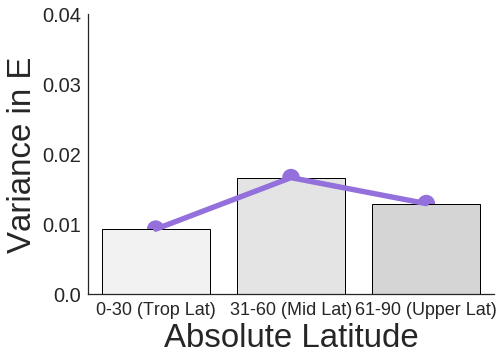

In [15]:
pal = sns.light_palette("darkgray")
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 5}            
sns.set(font_scale=3, style = 'white', rc = paper_rc) 
ax2 = sns.FacetGrid(E_vals, size = 6, aspect = 1.2)
ax2 = ax2.map(sns.barplot, 'lat_range', 'var_E', palette = pal, linewidth = 1, edgecolor = 'black')
ax2 = ax2.map(sns.pointplot,  'lat_range', 'var_E', color = 'mediumpurple')
ax2.set_axis_labels("Absolute Latitude","Variance in E")
plt.subplots_adjust(top=0.9, left = -0.001)
#ax2.fig.suptitle('Comparing variance across absolute latitude')
ax2.set_xticklabels(['0-30 (Trop Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 18)
ax2.set_yticklabels([0.00, 0.01, 0.02, 0.03, 0.04], fontsize = 20)
axes = ax2.axes
axes[0,0].set_ylim(0,0.04)

## Running F-test to check if the variance values in each simulation overall is the same compared to the actual data

In [16]:
F_actual_sim = np.var(E_vals.E_actual)/np.var(E_vals.E_sim_mean)

df_actual = len(E_vals.E_actual) - 1
df_sim = len(E_vals.E_sim_mean) - 1

p_actual_sim = stats.f.cdf(F_actual_sim, df_actual, df_sim)

print('Overall simulated vs. actual: statistic = ' + str(F_actual_sim) + ', p = ' + str(p_actual_sim))

Overall simulated vs. actual: statistic = 2.55730596596, p = 0.999999815711


# Running F-test to check for same variance across groups

In [17]:
alpha = 0.05 #Or whatever you want your alpha to be.

F_trop_mid = trop_var/mid_var
F_mid_upper = mid_var/upper_var
F_trop_upper = trop_var/upper_var

df_trop = len(E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)']) - 1
df_mid = len(E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)']) - 1
df_upper = len(E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)']) - 1

p_trop_mid = stats.f.cdf(F_trop_mid, df_trop, df_mid)
p_mid_upper = stats.f.cdf(F_mid_upper, df_mid, df_upper)
p_trop_upper = stats.f.cdf(F_trop_upper, df_trop, df_upper)

print('Tropical vs. mid: statistic = ' + str(F_trop_mid) + 'p: ' + str(p_trop_mid))
print('Mid vs. Upper: statistic = ' + str(F_mid_upper) + 'p: ' + str(p_mid_upper))
print('Tropical vs. Upper: statistic = ' + str(F_trop_upper) + 'p: ' + str(p_trop_upper))
print(trop_var)
print(mid_var)
print(upper_var)

Tropical vs. mid: statistic = 0.55646034457p: 0.128136145982
Mid vs. Upper: statistic = 1.28803200482p: 0.568932919683
Tropical vs. Upper: statistic = 0.71673873322p: 0.293705797036
0.00923735665452
0.016600206546
0.0128880388716


## Running a Bartlett's test for homogeneity of variance across the three latitudinal groups

In [18]:
trop_mid = stats.bartlett(E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'E_sim_mean'], 
                        E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'E_sim_mean'])
trop_up = stats.bartlett(E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'E_sim_mean'],
                       E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'E_sim_mean'])
mid_up = stats.bartlett(E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'E_sim_mean'],
                      E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'E_sim_mean'])

print("Tropical vs. Mid Lats Levene's test p-value : " + str(trop_mid[1]) + 
     "\nTropical vs. Upper Lats Levene's test p-value : " + str(trop_mid[1]) + 
     "\nMid vs. Upper Lats Levene's test p-value : " + str(mid_up[1]))

print(trop_mid)
print(mid_up)
print(trop_up)


Tropical vs. Mid Lats Levene's test p-value : 0.270343677611
Tropical vs. Upper Lats Levene's test p-value : 0.270343677611
Mid vs. Upper Lats Levene's test p-value : 0.905409827838
BartlettResult(statistic=1.2150023487350334, pvalue=0.27034367761149569)
BartlettResult(statistic=0.014120632695824455, pvalue=0.9054098278377084)
BartlettResult(statistic=0.32826005076583048, pvalue=0.56668543382974024)


## Running a post hoc Levene's test to see which of the lat groups have sig. diff. variances

In [19]:
trop_mid = stats.levene(E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'E_sim_mean'], 
                        E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'E_sim_mean'])
trop_up = stats.levene(E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'E_sim_mean'],
                       E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'E_sim_mean'])
mid_up = stats.levene(E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'E_sim_mean'],
                      E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'E_sim_mean'])

print("Tropical vs. Mid Lats Levene's test p-value : " + str(trop_mid[1]) + 
     "\nTropical vs. Upper Lats Levene's test p-value : " + str(trop_mid[1]) + 
     "\nMid vs. Upper Lats Levene's test p-value : " + str(mid_up[1]))

Tropical vs. Mid Lats Levene's test p-value : 0.225916495633
Tropical vs. Upper Lats Levene's test p-value : 0.225916495633
Mid vs. Upper Lats Levene's test p-value : 0.40634457067


## Plotting the same as above, but randomly removing samples from the Mid lats, so that there are the same number of samples as the Tropical lats (trying to remove bias in the variation)

In [20]:
# resetting the index values of the dataframe so that I can sample using 
# the row numbers                                                               
E_vals = E_vals.reset_index(drop = True)

# getting the values in the data frame that are in the mid-latitude band
mid_vals = E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)']
# resetting this index so that I have an index starting at 0 for this Series
mid_vals = mid_vals.reset_index(drop = True)

# setting a random seed so that I get the same results for every time I 
# run the code
random.seed(1)

for i in range(0, 150):
    # getting a random set of indeces from the mid_indeces Series that 
    # will be dropped from the Series 
    random_loc = random.sample(range(0, len(mid_vals.siteID)), 
                               (len(E_vals.var_E[E_vals.lat_range == '31-60 (Mid Lat)']) - len(E_vals.var_E[E_vals.lat_range == '0-30 (Tropical Lat)'])))

    # getting this subset of randomly selected mid-latitude observations
    mid_vals_to_remove = mid_vals.loc[random_loc,]

    # removing these observations from the subset of E values to be examined
    E_vals_subset = E_vals.loc[np.logical_not(E_vals.siteID.isin(mid_vals_to_remove.siteID.tolist()))]

    E_vals_subset.loc[E_vals_subset.lat_range == '0-30 (Tropical Lat)', 'var_E'] = np.var(E_vals_subset.E_sim_mean.loc[E_vals_subset.lat_range == '0-30 (Tropical Lat)'])
    E_vals_subset.loc[E_vals_subset.lat_range == '31-60 (Mid Lat)', 'var_E'] = np.var(E_vals_subset.E_sim_mean.loc[E_vals_subset.lat_range == '31-60 (Mid Lat)'])
    E_vals_subset.loc[E_vals_subset.lat_range == '61-90 (Upper Lat)', 'var_E'] = np.var(E_vals_subset.E_sim_mean.loc[E_vals_subset.lat_range == '61-90 (Upper Lat)'])

/home/cmee10/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


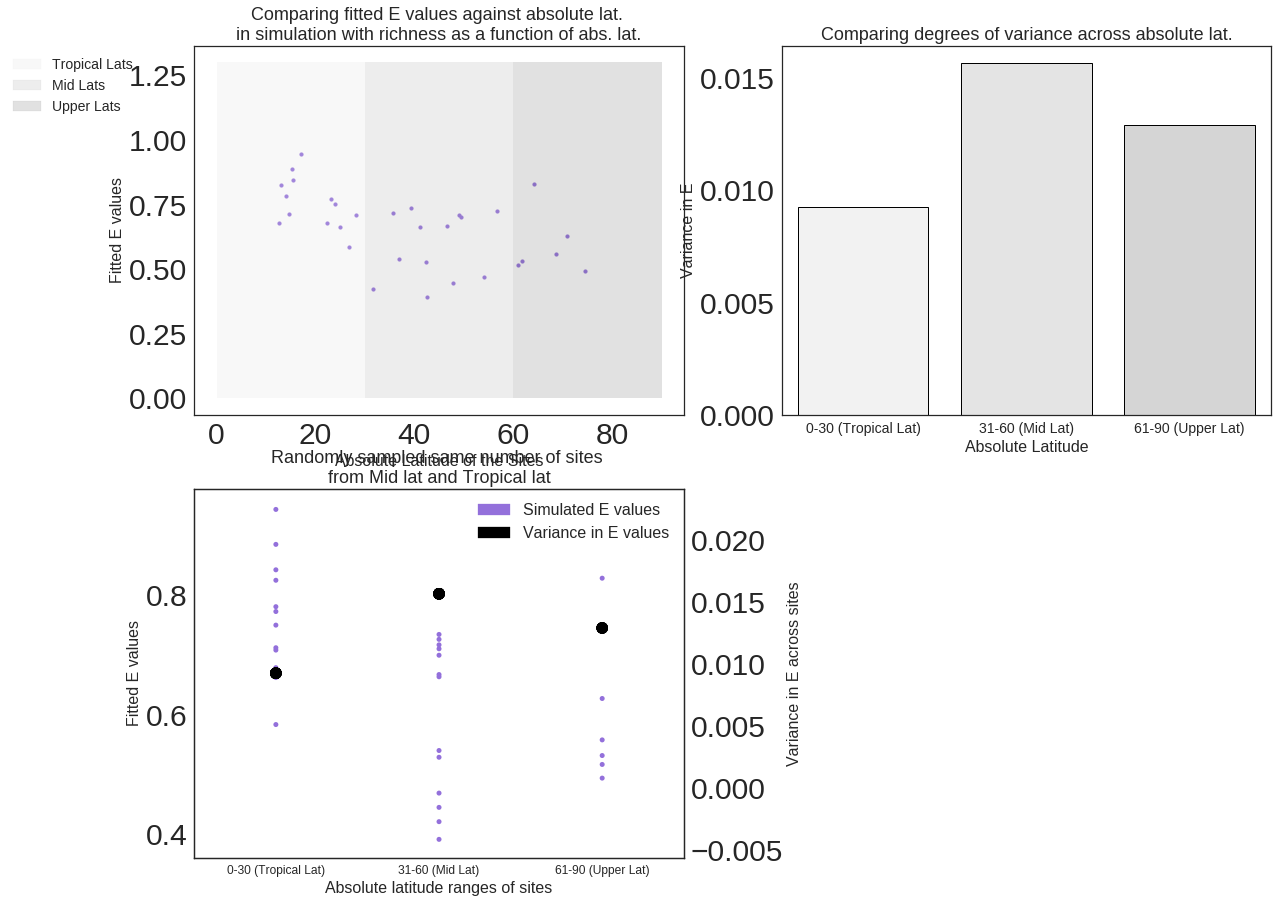

In [21]:
with plt.style.context("seaborn-white"):    
    fig, ax = plt.subplots(figsize = (17, 13))
    fig.tight_layout()

    ax1 = plt.subplot(2, 2, 1)
    plt.fill([0, 30, 30, 0], [0, 0, 1.3, 1.3], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.scatter(np.abs(E_vals_subset.lat),  E_vals_subset.E_sim_mean, color = 'mediumpurple', s = 14)
    plt.title('Comparing fitted E values against absolute lat. \nin simulation with richness as a function of abs. lat.', 
              fontsize = 18)
    plt.xlabel('Absolute Latitude of the Sites', fontsize = 16)
    plt.ylabel('Fitted E values', fontsize = 16)

    low_lat = mpatches.Patch(color='gainsboro', alpha = 0.2, label='Tropical Lats')
    mid_lat = mpatches.Patch(color = 'darkgray', alpha = 0.2, label = 'Mid Lats')
    upper_lat = mpatches.Patch(color = 'dimgray', alpha = 0.2, label = 'Upper Lats')
    plt.legend(bbox_to_anchor=(-0.1, 1.0), handles=[low_lat, mid_lat, upper_lat], fontsize = 14)

    ax2 = plt.subplot(2, 2, 2)
    pal = sns.light_palette("darkgray")
    sns.barplot(E_vals_subset.lat_range, E_vals_subset.var_E, palette = pal, linewidth = 1, edgecolor = 'black')
    ax2.set_title('Comparing degrees of variance across absolute lat.', fontsize = 18)
    ax2.set_ylabel('Variance in E', fontsize = 16)
    ax2.set_xlabel('Absolute Latitude', fontsize = 16)
    ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)

    ax3 = plt.subplot(2, 2, 3)
    sns.stripplot(E_vals.lat_range, E_vals_subset.E_sim_mean, color = 'mediumpurple', label = 'E values')
    ax3.set_xlabel('Absolute latitude ranges of sites', fontsize = 16)
    ax3.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 12)
    ax3.set_ylabel('Fitted E values', fontsize = 16)
    ax3.set_title('Randomly sampled same number of sites \nfrom Mid lat and Tropical lat',
                 fontsize = 18)
    ax4 = ax3.twinx()
    sns.stripplot(E_vals_subset.lat_range, E_vals_subset.var_E, color = 'black', size = 10, linewidth = 1.5, edgecolor = 'black')
    ax4.set_ylabel('Variance in E across sites', fontsize = 16)

    blue_patch = mpatches.Patch(color='mediumpurple', label='Simulated E values')
    black_patch = mpatches.Patch(color = 'black', label = 'Variance in E values')
    plt.legend(handles=[blue_patch, black_patch], fontsize = 16)

(0, 0.08)

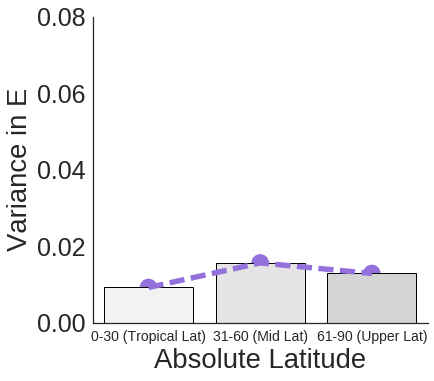

In [22]:
pal = sns.light_palette("darkgray")
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 5}            
sns.set(font_scale=2.5, style = 'white', rc = paper_rc) 
ax2 = sns.FacetGrid(E_vals_subset, size = 6, aspect = 1.25)
ax2 = ax2.map(sns.barplot, 'lat_range', 'var_E', palette = pal, linewidth = 1, edgecolor = 'black')
ax2 = ax2.map(sns.pointplot,  'lat_range', 'var_E', color = 'mediumpurple', linestyles = 'dashed')
ax2.set_axis_labels("Absolute Latitude","Variance in E")
ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)
axes = ax2.axes
axes[0,0].set_ylim(0,0.08)

## Running Bartlett's to compare simulated and actual in each latitude bin

In [23]:
tropical_lev = stats.bartlett(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'], 
                            E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'])

mid_lev = stats.bartlett(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'], 
                       E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'])

upper_lev = stats.bartlett(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'], 
                         E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'])

overall_lev = stats.bartlett(E_vals.E_sim_mean, E_vals.E_actual)

print('Overall: ' + str(overall_lev))
print('Tropical: ' + str(tropical_lev))
print('Mid: ' + str(mid_lev))
print('Upper: ' + str(upper_lev))


Overall: BartlettResult(statistic=25.850568385469153, pvalue=3.6889605342927641e-07)
Tropical: BartlettResult(statistic=12.969132749759545, pvalue=0.00031666867304064772)
Mid: BartlettResult(statistic=10.757427134890589, pvalue=0.0010386166838742699)
Upper: BartlettResult(statistic=3.2661447783307289, pvalue=0.070723643782508255)


## Running Levene's test for each of these latitudinal band distriutions (comparing variance of richness & temp-wrt-lat simulation and the actual data)

In [24]:
# Running Levene's test for each of these latitudinal band distriutions (comparing variance of
# richness-wrt-lat simulation and the actual fits of the E value in the fluxnet data)
tropical_lev = stats.levene(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'], 
                            E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'])

mid_lev = stats.levene(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'], 
                       E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'])

upper_lev = stats.levene(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'], 
                         E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'])

overall_lev = stats.levene(E_vals.E_sim_mean, E_vals.E_actual)

print("Tropical Latitudes (0-30) Levene's test p-value: " + str(tropical_lev[1]) + 
      "\nMid Latitudes (31-60) Levene's test p-value: " + str(mid_lev[1]) + 
      "\nUpper Latitudes (61-90) Levene's test p-value: " + str(upper_lev[1]) +
      "\nOverall Levene's test p-value: " + str(overall_lev[1]))

Tropical Latitudes (0-30) Levene's test p-value: 0.00377120105321
Mid Latitudes (31-60) Levene's test p-value: 0.00502521962985
Upper Latitudes (61-90) Levene's test p-value: 0.190286065578
Overall Levene's test p-value: 4.70739187721e-05


# Comparing variation of simulation to actual data across the three latitudinal bands 

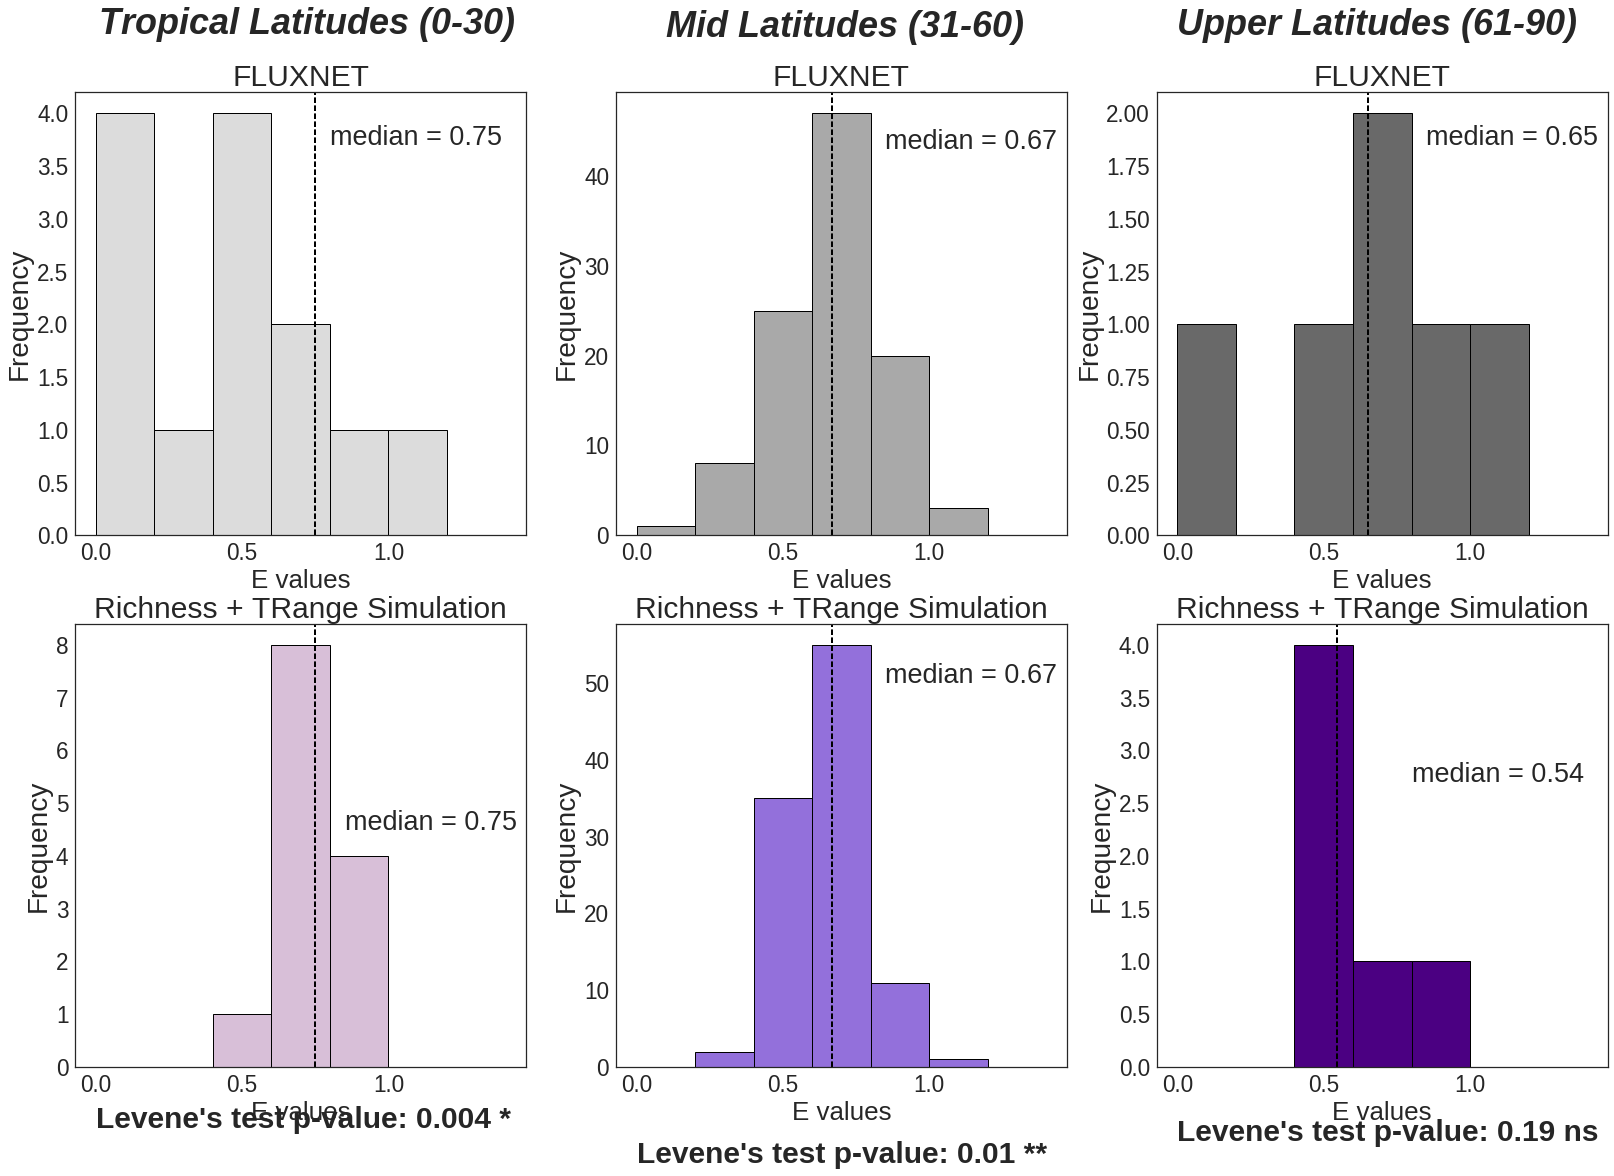

In [25]:
from matplotlib.font_manager import FontProperties

font0 = FontProperties()

font = font0.copy()
font.set_style('italic')
font.set_weight('bold')

fonty = font0.copy()
fonty.set_weight('bold')

fig, ax = plt.subplots(figsize = (23, 15))
fig.tight_layout()          
sns.set(font_scale=2.25, style = 'white', rc = paper_rc) 

ax1 = plt.subplot(2, 3, 4)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'thistle', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)

plt.title("Richness + TRange Simulation", fontsize = 30)
plt.text(0, -1.15, "Levene's test p-value: " + str(round(tropical_lev[1], 3)) + ' *', fontproperties = fonty, fontsize = 30)
plt.text(0.85, 4.5, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 2)))

ax2 = plt.subplot(2, 3, 1)
binwidth = 0.2
plt.hist(E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'gainsboro', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.title("FLUXNET", fontsize = 30)
plt.text(0.8, 3.7, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 2)))
plt.text(0.01, 4.75, 'Tropical Latitudes (0-30)', fontsize = 36, fontproperties = font)

ax3 = plt.subplot(2, 3, 5)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'mediumpurple', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.title("Richness + TRange Simulation", fontsize = 30)
plt.text(0.85, 50, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 2)))
plt.text(0, -12.5, "Levene's test p-value: " + str(round(mid_lev[1], 2)) + ' **', fontproperties = fonty, fontsize = 30)

ax4 = plt.subplot(2, 3, 2)
binwidth = 0.2
plt.hist(E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'darkgray', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.title("FLUXNET", fontsize = 30)
plt.text(0.85, 43, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 2)))
plt.text(0.1, 55.5, 'Mid Latitudes (31-60)', fontsize = 36, fontproperties = font)

ax5 = plt.subplot(2, 3, 6)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'indigo', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.title("Richness + TRange Simulation", fontsize = 30)
plt.text(0.8, 2.7, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 2)))
plt.text(0, -0.7, "Levene's test p-value: " + str(round(upper_lev[1], 2)) + ' ns', fontproperties = fonty, fontsize = 30)

ax6 = plt.subplot(2, 3, 3)
binwidth = 0.2
plt.hist(E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'dimgray', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.text(0.85, 1.85, 'median = ' + 
         str(np.round(E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 2)))
plt.title("FLUXNET", fontsize = 30)
plt.text(0, 2.37, 'Upper Latitudes (61-90)', fontsize = 36, fontproperties = font)

## Plotting the histograms of the combined latitudes E values

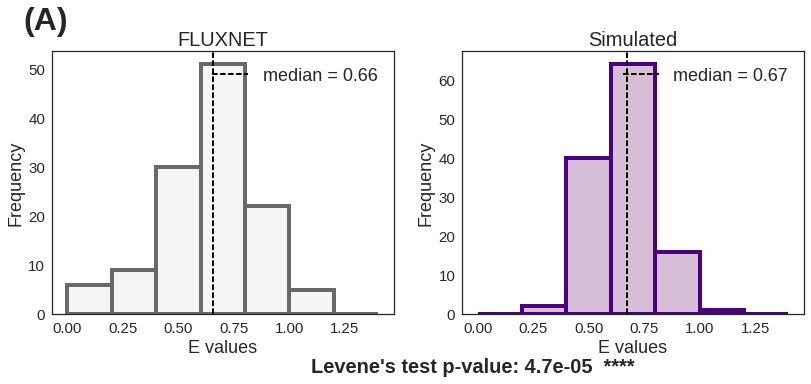

In [26]:
fig, ax = plt.subplots(figsize = (12, 5))
fig.tight_layout()          
sns.set(font_scale=1.5, style = 'white', rc = paper_rc) 

ax1 = plt.subplot(1, 2, 1)
binwidth = 0.2
plt.hist(E_vals.E_actual, bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'whitesmoke', linewidth = 4, edgecolor = 'dimgrey')
plt.xlabel('E values', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.axvline(E_vals.E_actual.median(), color='k', linestyle='dashed', linewidth=2, 
           label = 'median = ' + str(np.round(E_vals.E_actual.median(), 2)))
plt.title("FLUXNET", fontsize = 20)
plt.legend(fontsize = 18)
plt.text(-0.2, 58, '(A)', fontsize = 32, fontweight = 'bold')

ax2 = plt.subplot(1,2,2)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean, bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'thistle', linewidth = 4, edgecolor = 'indigo')
plt.xlabel('E values', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.axvline(E_vals.E_sim_mean.median(), color='k', linestyle='dashed', linewidth=2, 
           label = 'median = ' + str(np.round(E_vals.E_sim_mean.median(), 2)))
plt.title("Simulated", fontsize = 20)
plt.legend(fontsize = 18)

plt.text(-0.75, -15, "Levene's test p-value: " + str(round(stats.levene(E_vals.E_sim_mean, E_vals.E_actual)[1], 6)) + '  ****', fontweight = 'bold', fontsize = 20)

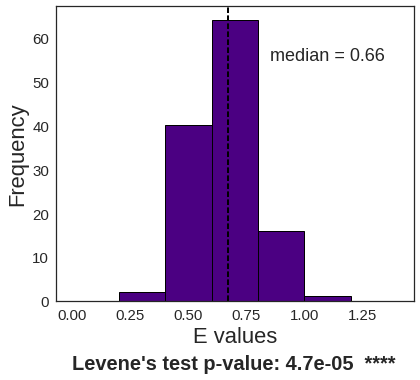

In [27]:
fig, ax = plt.subplots(figsize = (12, 5))
fig.tight_layout()          
sns.set(font_scale=1.5, style = 'white', rc = paper_rc) 

ax2 = plt.subplot(1,2,1)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean, bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'indigo', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 22)
plt.ylabel('Frequency', fontsize = 22)
plt.axvline(E_vals.E_sim_mean.median(), color='k', linestyle='dashed', linewidth=2, 
           label = 'median = ' + str(np.round(E_vals.E_sim_mean.median(), 2)))
plt.text(0.85, 55, 'median = ' + str(np.round(E_vals.E_actual.median(), 2)))


plt.text(0, -15.5, "Levene's test p-value: " + str(round(stats.levene(E_vals.E_sim_mean, E_vals.E_actual)[1], 6)) + '  ****', fontweight = 'bold', fontsize = 20)

# Richness and temp range wrt lat (but using actual data temps)

In [28]:
with plt.style.context("seaborn-white"):
    fig, ax = plt.subplots(figsize = (16, 15))
    fig.tight_layout()

    ax1 = plt.subplot(2, 2, 1)
    plt.fill([0, 30, 30, 0], [0, 0, 1.3, 1.3], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.scatter(np.abs(E_vals.lat),  E_vals.E_sim_mean_actual_temps, color = 'indigo', s = 14)
    plt.title('Comparing fitted E values against absolute lat. \nin simulation with richness as a function of abs. lat.', 
              fontsize = 18)
    plt.xlabel('Absolute Latitude of the Sites', fontsize = 16)
    plt.ylabel('Fitted E values', fontsize = 16)

    low_lat = mpatches.Patch(color='gainsboro', alpha = 0.2, label='Tropical Lats')
    mid_lat = mpatches.Patch(color = 'darkgray', alpha = 0.2, label = 'Mid Lats')
    upper_lat = mpatches.Patch(color = 'dimgray', alpha = 0.2, label = 'Upper Lats')
    plt.legend(bbox_to_anchor=(-0.1, 1.0), handles=[low_lat, mid_lat, upper_lat], fontsize = 14)

    ax2 = plt.subplot(2, 2, 2)
    pal = sns.light_palette("darkgray")
    sns.barplot(E_vals.lat_range, E_vals.var_E_actual_temps, palette = pal, linewidth = 1, edgecolor = 'black')
    #sns.stripplot(E_vals.lat_range, E_vals.var_E,color = 'royalblue',  linewidth = 1, edgecolor = 'black')
    ax2.set_title('Comparing degrees of variance across absolute lat.', fontsize = 18)
    ax2.set_ylabel('Variance in E', fontsize = 16)
    ax2.set_xlabel('Absolute Latitude', fontsize = 16)
    ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)

    ax3 = plt.subplot(2, 2, 3)
    sns.stripplot(E_vals.lat_range, E_vals.E_sim_mean_actual_temps, color = 'indigo', label = 'E values')
    ax3.set_xlabel('Absolute latitude ranges of sites', fontsize = 16)
    ax3.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 12)
    ax3.set_ylabel('Fitted E values', fontsize = 16)
    ax3.set_title('Randomly sampled same number of sites \nfrom Mid lat and Tropical lat',
                 fontsize = 18)
    ax4 = ax3.twinx()
    sns.stripplot(E_vals.lat_range, E_vals.var_E_actual_temps, color = 'black', size = 10)
    ax4.set_ylabel('Variance in E across sites', fontsize = 16)

    blue_patch = mpatches.Patch(color='indigo', label='Simulated E values')
    black_patch = mpatches.Patch(color = 'black', label = 'Variance in E values')
    plt.legend(handles=[blue_patch, black_patch], fontsize = 16)


(0, 0.08)

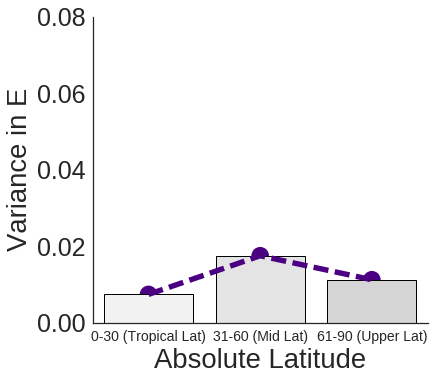

In [29]:
pal = sns.light_palette("darkgray")
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 5}            
sns.set(font_scale=2.5, style = 'white', rc = paper_rc) 
ax2 = sns.FacetGrid(E_vals, size = 6, aspect = 1.25)
ax2 = ax2.map(sns.barplot, 'lat_range', 'var_E_actual_temps', palette = pal, linewidth = 1, edgecolor = 'black')
ax2 = ax2.map(sns.pointplot,  'lat_range', 'var_E_actual_temps', color = 'indigo', linestyles = 'dashed')
ax2.set_axis_labels("Absolute Latitude","Variance in E")
ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)
axes = ax2.axes
axes[0,0].set_ylim(0,0.08)

## Plotting the same as above, but randomly removing samples from the Mid lats, so that there are the same number of samples as the Tropical lats (trying to remove bias in the variation)

In [30]:
with plt.style.context("seaborn-white"):
    fig, ax = plt.subplots(figsize = (17, 13))
    fig.tight_layout()

    ax1 = plt.subplot(2, 2, 1)
    plt.fill([0, 30, 30, 0], [0, 0, 1.3, 1.3], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.scatter(np.abs(E_vals_subset.lat),  E_vals_subset.E_sim_mean_actual_temps, color = 'mediumpurple', s = 14)
    plt.title('Comparing fitted E values against absolute lat. \nin simulation with richness as a function of abs. lat.', 
              fontsize = 18)
    plt.xlabel('Absolute Latitude of the Sites', fontsize = 16)
    plt.ylabel('Fitted E values', fontsize = 16)

    low_lat = mpatches.Patch(color='gainsboro', alpha = 0.2, label='Tropical Lats')
    mid_lat = mpatches.Patch(color = 'darkgray', alpha = 0.2, label = 'Mid Lats')
    upper_lat = mpatches.Patch(color = 'dimgray', alpha = 0.2, label = 'Upper Lats')
    plt.legend(bbox_to_anchor=(-0.1, 1.0), handles=[low_lat, mid_lat, upper_lat], fontsize = 14)

    ax2 = plt.subplot(2, 2, 2)
    pal = sns.light_palette("darkgray")
    sns.barplot(E_vals_subset.lat_range, E_vals_subset.var_E_actual_temps, palette = pal, linewidth = 1, edgecolor = 'black')
    ax2.set_title('Comparing degrees of variance across absolute lat.', fontsize = 18)
    ax2.set_ylabel('Variance in E', fontsize = 16)
    ax2.set_xlabel('Absolute Latitude', fontsize = 16)
    ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)

    ax3 = plt.subplot(2, 2, 3)
    sns.set_style('white')
    sns.stripplot(E_vals.lat_range, E_vals_subset.E_sim_mean_actual_temps, color = 'mediumpurple', label = 'E values')
    ax3.set_xlabel('Absolute latitude ranges of sites', fontsize = 16)
    ax3.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 12)
    ax3.set_ylabel('Fitted E values', fontsize = 16)
    ax3.set_title('Randomly sampled same number of sites \nfrom Mid lat and Tropical lat',
                 fontsize = 18)
    ax4 = ax3.twinx()
    sns.stripplot(E_vals_subset.lat_range, E_vals_subset.var_E_actual_temps, color = 'black', size = 10)
    ax4.set_ylabel('Variance in E across sites', fontsize = 16)

    blue_patch = mpatches.Patch(color='mediumpurple', label='Simulated E values')
    black_patch = mpatches.Patch(color = 'black', label = 'Variance in E values')
    plt.legend(handles=[blue_patch, black_patch], fontsize = 16)

(0, 0.08)

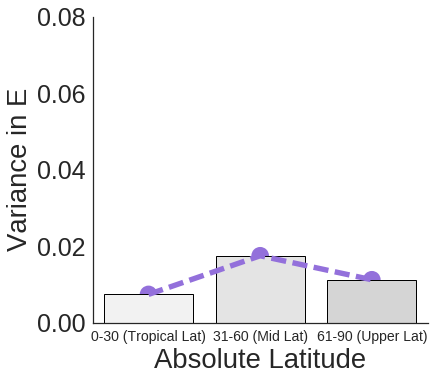

In [31]:
pal = sns.light_palette("darkgray")
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 5}            
sns.set(font_scale=2.5, style = 'white', rc = paper_rc) 
ax2 = sns.FacetGrid(E_vals_subset, size = 6, aspect = 1.25)
ax2 = ax2.map(sns.barplot, 'lat_range', 'var_E_actual_temps', palette = pal, linewidth = 1, edgecolor = 'black')
ax2 = ax2.map(sns.pointplot,  'lat_range', 'var_E_actual_temps', color = 'mediumpurple', linestyles = 'dashed')
ax2.set_axis_labels("Absolute Latitude","Variance in E")
ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)
axes = ax2.axes
axes[0,0].set_ylim(0,0.08)

In [32]:
trop_mid = stats.levene(E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '0-30 (Tropical Lat)'], 
                            E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '31-60 (Mid Lat)'])
mid_upper = stats.levene(E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '31-60 (Mid Lat)'], 
                       E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '61-90 (Upper Lat)'])
trop_upper = stats.levene(E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '61-90 (Upper Lat)'], 
                         E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '0-30 (Tropical Lat)'])

print(trop_mid)
print(mid_upper)
print(trop_upper)

LeveneResult(statistic=1.2079416639845648, pvalue=0.2826435342956769)
LeveneResult(statistic=0.50520957451757253, pvalue=0.48685807869337527)
LeveneResult(statistic=0.00021618576560075866, pvalue=0.98844010137945704)


## Running Levene's test for each of these latitudinal band distriutions (comparing variance of richness & temp-wrt-lat simulation and the actual data)

In [33]:
# Running Levene's test for each of these latitudinal band distriutions (comparing variance of
# richness-wrt-lat simulation and the actual fits of the E value in the fluxnet data)
tropical_lev = stats.levene(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '0-30 (Tropical Lat)'], 
                            E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'])

mid_lev = stats.levene(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '31-60 (Mid Lat)'], 
                       E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'])

upper_lev = stats.levene(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '61-90 (Upper Lat)'], 
                         E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'])

overall_lev = stats.levene(E_vals.E_sim_mean_actual_temps, E_vals.E_actual)

print("Tropical Latitudes (0-30) Levene's test p-value: " + str(tropical_lev[1]) + 
      "\nMid Latitudes (31-60) Levene's test p-value: " + str(mid_lev[1]) + 
      "\nUpper Latitudes (61-90) Levene's test p-value: " + str(upper_lev[1]) + 
      "\nOverall Levene's test p-value: " + str(overall_lev[1]))

trop_mid = stats.levene(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'], 
                            E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'])
mid_upper = stats.levene(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'], 
                       E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'])
trop_upper = stats.levene(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'], 
                         E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'])

print(trop_mid)
print(mid_upper)
print(trop_upper)

Tropical Latitudes (0-30) Levene's test p-value: 0.00250795717126
Mid Latitudes (31-60) Levene's test p-value: 0.010095765586
Upper Latitudes (61-90) Levene's test p-value: 0.181213039187
Overall Levene's test p-value: 0.000144010954366
LeveneResult(statistic=1.4822413071454761, pvalue=0.22591649563294117)
LeveneResult(statistic=0.6948940419572045, pvalue=0.40634457067043239)
LeveneResult(statistic=0.00021618576560075866, pvalue=0.98844010137945704)


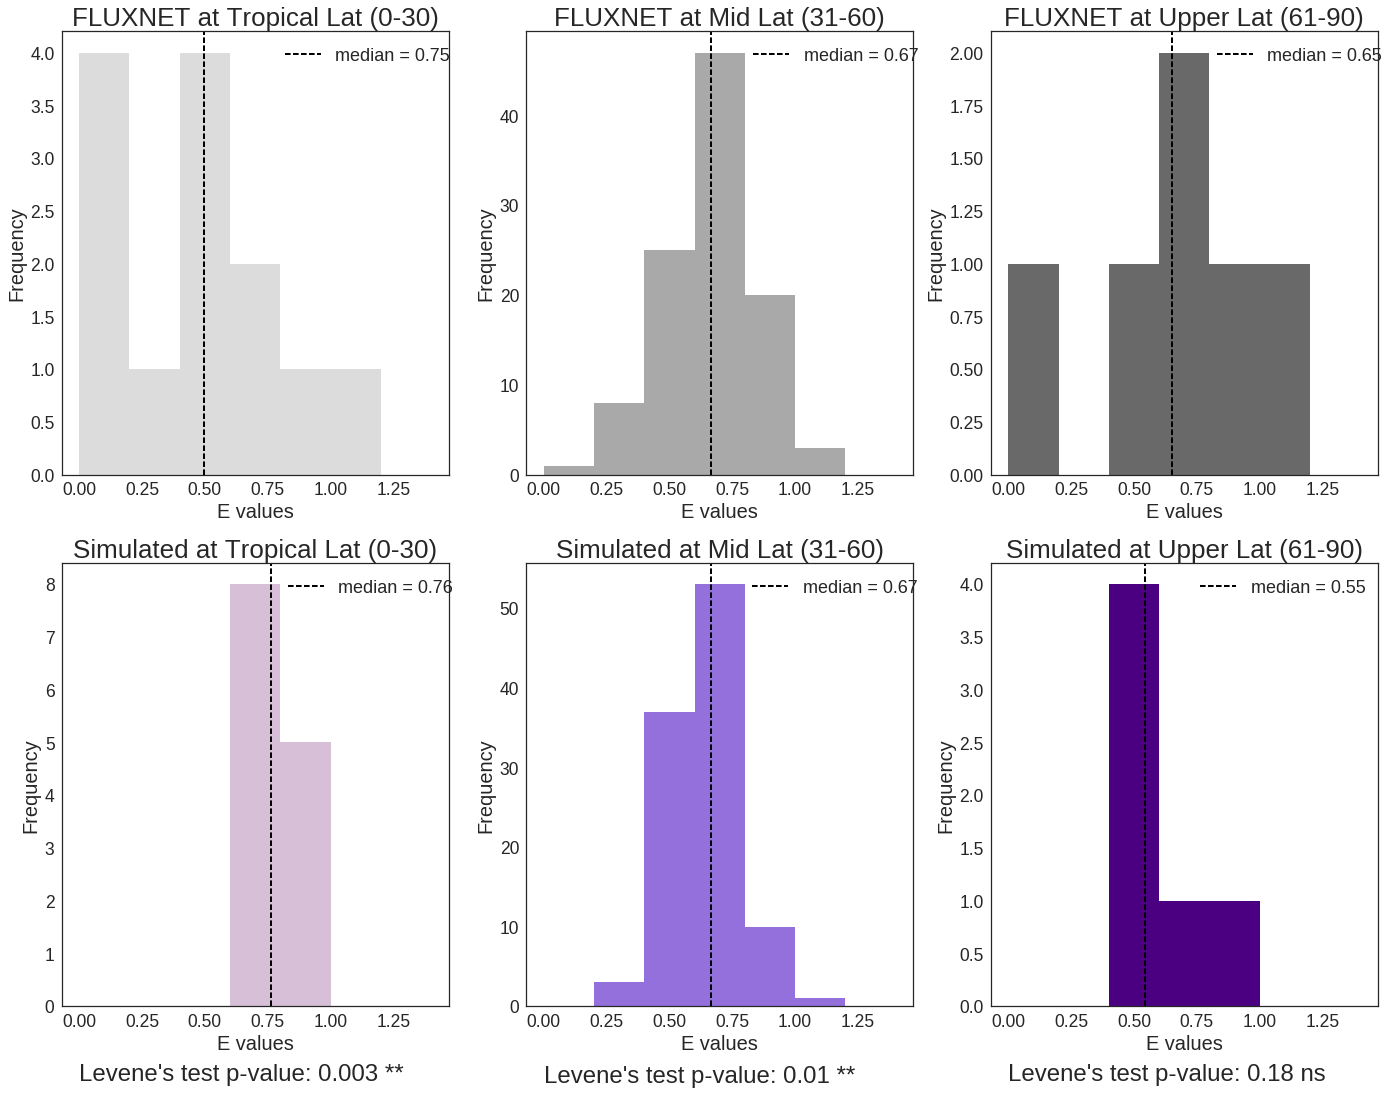

In [34]:
fig, ax = plt.subplots(figsize = (20, 15))
fig.tight_layout()          
sns.set(font_scale=1.75, style = 'white', rc = paper_rc) 

ax1 = plt.subplot(2, 3, 4)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '0-30 (Tropical Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'thistle')
plt.xlabel('E values', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.axvline(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2, 
           label = 'median = ' + str(np.round(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 2)))
plt.title("Simulated at Tropical Lat (0-30)", fontsize = 26)
plt.legend(fontsize = 18, bbox_to_anchor=(0.543, 1.0))
plt.text(0, -1.4, "Levene's test p-value: " + str(round(tropical_lev[1], 3)) + ' **', fontsize = 24)

ax2 = plt.subplot(2, 3, 1)
binwidth = 0.2
plt.hist(E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'gainsboro')
plt.xlabel('E values', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.axvline(E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2, 
           label = 'median = ' + 
           str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 2)))
plt.title("FLUXNET at Tropical Lat (0-30)", fontsize = 26)
plt.legend(fontsize = 18, bbox_to_anchor=(0.535, 1.0))

ax3 = plt.subplot(2, 3, 5)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '31-60 (Mid Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'mediumpurple')
plt.xlabel('E values', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.axvline(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2,
           label = 'median = ' + str(np.round(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 2)))
plt.title("Simulated at Mid Lat (31-60)", fontsize = 26)
plt.legend(fontsize = 18, bbox_to_anchor=(0.5423, 1.0))
plt.text(0, -9.5, "Levene's test p-value: " + str(round(mid_lev[1], 2)) + ' **', fontsize = 24)

a4 = plt.subplot(2, 3, 2)
binwidth = 0.2
plt.hist(E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'darkgray')
plt.xlabel('E values', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2,
           label = 'median = ' + str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 2)))
plt.title("FLUXNET at Mid Lat (31-60)", fontsize = 26)
plt.legend(fontsize = 18, bbox_to_anchor=(0.545, 1.0))

ax5 = plt.subplot(2, 3, 6)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '61-90 (Upper Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'indigo')
plt.xlabel('E values', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.axvline(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2, 
           label = 'median = ' + str(np.round(E_vals.E_sim_mean_actual_temps[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 2)))
plt.title("Simulated at Upper Lat (61-90)", fontsize = 26)
plt.legend(fontsize = 18, bbox_to_anchor=(0.5, 1.0))
plt.text(0, -0.7, "Levene's test p-value: " + str(round(upper_lev[1], 2)) + ' ns', fontsize = 24)

ax6 = plt.subplot(2, 3, 3)
binwidth = 0.2
plt.hist(E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'dimgray')
plt.xlabel('E values', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.axvline(E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2, 
            label = 'median = ' + str(np.round(E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 2)))
plt.legend()
plt.legend(fontsize = 18, bbox_to_anchor=(0.5425, 1.0))
plt.title("FLUXNET at Upper Lat (61-90)", fontsize = 26)

## Running F-test to check if the variance values in each simulation group is the same compared to the actual data

In [35]:
F_trop = trop_var/trop_var_actual
F_mid = mid_var/mid_var_actual
F_upper = trop_var/mid_var_actual

df_trop = len(E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)']) - 1
df_mid = len(E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)']) - 1
df_upper = len(E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)']) - 1

p_trop = stats.f.cdf(F_trop, df_trop, df_trop)
p_mid = stats.f.cdf(F_mid, df_mid, df_mid)
p_upper = stats.f.cdf(F_upper, df_upper, df_upper)

print('Tropical : statistic = ' + str(F_trop) + ', p = ' + str(p_trop))
print('Mid: statistic = ' + str(F_mid) + ', p = ' + str(p_mid))
print('Upper: statistic = ' + str(F_upper) + ', p = ' + str(p_upper))

Tropical : statistic = 0.097723864029, p = 0.000154865097817
Mid: statistic = 0.520172542131, p = 0.000519214824508
Upper: statistic = 0.28945539203, p = 0.0999113866282


## Removing the E values of sites that were < 0.24 (since biotraits doesn't have any species with fitted E values below this)

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 8 Text yticklabel objects>)

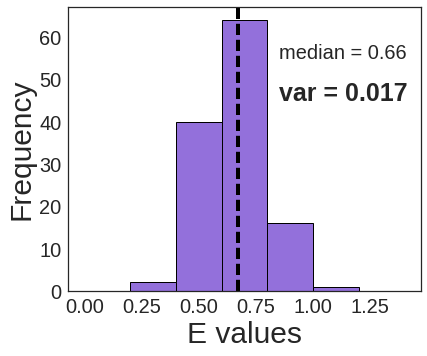

In [36]:
fig, ax = plt.subplots(figsize = (12, 5))
fig.tight_layout()          
sns.set(font_scale=1.5, style = 'white', rc = paper_rc) 

ax2 = plt.subplot(1,2,1)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean, bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'mediumpurple', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 30)
plt.ylabel('Frequency', fontsize = 30)
plt.axvline(E_vals.E_sim_mean.median(), color='k', linestyle='dashed', linewidth=4, 
           label = 'median = ' + str(np.round(E_vals.E_sim_mean.median(), 2)))
plt.text(0.85, 55, 'median = ' + str(np.round(E_vals.E_actual.median(), 2)), fontsize = 20)
plt.text(0.85, 45, 'var = ' + str(np.round(np.var(E_vals.E_sim_mean,), 3)), fontsize = 25, fontweight = 'bold')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#plt.text(-0.2, -17, "Levene's test p-value: " + str(round(stats.levene(E_vals.E_sim_mean, E_vals.E_actual)[1], 4)) + '  **', fontweight = 'bold', fontsize = 30)
